
Use the "Run" button to execute the code.

In [1]:
!pip install jovian --upgrade --quiet

     |████████████████████████████████| 68 kB 1.4 MB/s 


## Installing important libraries


In [2]:
!pip install opendatasets scikit-learn plotly folium --upgrade --quiet

     |████████████████████████████████| 27.7 MB 1.5 MB/s 
     |████████████████████████████████| 95 kB 3.0 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.12.1.post1 which is incompatible.


In [3]:
import opendatasets as od

In [4]:
od.version()

'0.1.20'

In [5]:
dataset_url = 'https://www.kaggle.com/c/predicting-red-hat-business-value/data'

## Download the Dataset

In [6]:
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: rajatsoni1991
Your Kaggle Key: ··········


100%|██████████| 25.5M/25.5M [00:00<00:00, 130MB/s] 


Extracting archive ./predicting-red-hat-business-value/predicting-red-hat-business-value.zip to ./predicting-red-hat-business-value


In [7]:
import os

In [8]:
data_dir = './predicting-red-hat-business-value'
os.listdir(data_dir)

['act_test.csv.zip',
 'act_train.csv.zip',
 'sample_submission.csv.zip',
 'people.csv.zip']

In [9]:
import pandas as pd

In [10]:
from zipfile import ZipFile
with ZipFile(data_dir+'/act_train.csv.zip') as f:
  f.extractall(path= 'red-hat-business')



In [11]:
with ZipFile(data_dir+'/act_test.csv.zip') as f:
  f.extractall(path= 'red-hat-business')

In [12]:
with ZipFile(data_dir+'/people.csv.zip') as f:
  f.extractall(path= 'red-hat-business')

In [13]:

train_csv = pd.read_csv('red-hat-business/act_train.csv')
test_csv = pd.read_csv('red-hat-business/act_test.csv')
people_csv = pd.read_csv('red-hat-business/people.csv')

In [14]:
train_csv.shape


(2197291, 15)

In [15]:
train_csv.head(5)

,people_id,activity_id,date,activity_category,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,outcome
0,ppl_100,act2_1734928,2023-08-26,type 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 76,0
1,ppl_100,act2_2434093,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
2,ppl_100,act2_3404049,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
3,ppl_100,act2_3651215,2023-08-04,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
4,ppl_100,act2_4109017,2023-08-26,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0


In [16]:
train_csv.char_6.sample(20)

1847851       NaN
61085         NaN
1106712       NaN
279940        NaN
288008        NaN
1344635       NaN
1720721       NaN
932081        NaN
164275        NaN
1317341       NaN
1176356       NaN
98325         NaN
1005077       NaN
740114        NaN
682774        NaN
2132494       NaN
1247854       NaN
1047687       NaN
1237063       NaN
1546820    type 2
Name: char_6, dtype: object

## Merge 2 files

In [17]:
merged_df = train_csv.merge(people_csv, how= 'left', on= 'people_id')

In [18]:
merged_df.shape

(2197291, 55)

## Exploratory Data Analysis

In [19]:
merged_df.isnull().sum()

people_id                  0
activity_id                0
date_x                     0
activity_category          0
char_1_x             2039676
char_2_x             2039676
char_3_x             2039676
char_4_x             2039676
char_5_x             2039676
char_6_x             2039676
char_7_x             2039676
char_8_x             2039676
char_9_x             2039676
char_10_x             157615
outcome                    0
char_1_y                   0
group_1                    0
char_2_y                   0
date_y                     0
char_3_y                   0
char_4_y                   0
char_5_y                   0
char_6_y                   0
char_7_y                   0
char_8_y                   0
char_9_y                   0
char_10_y                  0
char_11                    0
char_12                    0
char_13                    0
char_14                    0
char_15                    0
char_16                    0
char_17                    0
char_18       

In [20]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2197291 entries, 0 to 2197290
Data columns (total 55 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   people_id          object
 1   activity_id        object
 2   date_x             object
 3   activity_category  object
 4   char_1_x           object
 5   char_2_x           object
 6   char_3_x           object
 7   char_4_x           object
 8   char_5_x           object
 9   char_6_x           object
 10  char_7_x           object
 11  char_8_x           object
 12  char_9_x           object
 13  char_10_x          object
 14  outcome            int64 
 15  char_1_y           object
 16  group_1            object
 17  char_2_y           object
 18  date_y             object
 19  char_3_y           object
 20  char_4_y           object
 21  char_5_y           object
 22  char_6_y           object
 23  char_7_y           object
 24  char_8_y           object
 25  char_9_y           object
 26  char_10_y     

In [21]:
merged_df.date_x.min(),merged_df.date_x.max()

('2022-07-17', '2023-08-31')

In [22]:
max_date = pd.to_datetime(merged_df['date_x']).dt.date.max()
max_date

datetime.date(2023, 8, 31)

In [23]:
type(max_date)

datetime.date

In [24]:
for d in ['date_x','date_y']:
  print('Start of ' + d + ': ' + str(pd.to_datetime(merged_df.date_x).dt.date.min()))
  print('  End of ' + d + ': ' + str(pd.to_datetime(merged_df.date_x).dt.date.max()))
 


Start of date_x: 2022-07-17
  End of date_x: 2023-08-31
Start of date_y: 2022-07-17
  End of date_y: 2023-08-31


In [25]:
merged_df.isnull().sum()

people_id                  0
activity_id                0
date_x                     0
activity_category          0
char_1_x             2039676
char_2_x             2039676
char_3_x             2039676
char_4_x             2039676
char_5_x             2039676
char_6_x             2039676
char_7_x             2039676
char_8_x             2039676
char_9_x             2039676
char_10_x             157615
outcome                    0
char_1_y                   0
group_1                    0
char_2_y                   0
date_y                     0
char_3_y                   0
char_4_y                   0
char_5_y                   0
char_6_y                   0
char_7_y                   0
char_8_y                   0
char_9_y                   0
char_10_y                  0
char_11                    0
char_12                    0
char_13                    0
char_14                    0
char_15                    0
char_16                    0
char_17                    0
char_18       

In [26]:
merged_df.isnull().sum()/merged_df.shape[0]

people_id            0.000000
activity_id          0.000000
date_x               0.000000
activity_category    0.000000
char_1_x             0.928268
char_2_x             0.928268
char_3_x             0.928268
char_4_x             0.928268
char_5_x             0.928268
char_6_x             0.928268
char_7_x             0.928268
char_8_x             0.928268
char_9_x             0.928268
char_10_x            0.071732
outcome              0.000000
char_1_y             0.000000
group_1              0.000000
char_2_y             0.000000
date_y               0.000000
char_3_y             0.000000
char_4_y             0.000000
char_5_y             0.000000
char_6_y             0.000000
char_7_y             0.000000
char_8_y             0.000000
char_9_y             0.000000
char_10_y            0.000000
char_11              0.000000
char_12              0.000000
char_13              0.000000
char_14              0.000000
char_15              0.000000
char_16              0.000000
char_17   

### Drop coulmns with max null values

In [27]:
merged_df = merged_df.drop(['char_1_x','char_2_x','char_3_x','char_4_x','char_5_x','char_6_x','char_7_x','char_8_x','char_9_x'], axis=1)


In [28]:
merged_df.dropna(subset=['char_10_x'],inplace=True)

In [29]:
merged_df.outcome.value_counts()

0    1129010
1     910666
Name: outcome, dtype: int64

### Visualising the data

In [30]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10, 6)

sns.set_style('darkgrid')


In [31]:
merged_df.columns

Index(['people_id', 'activity_id', 'date_x', 'activity_category', 'char_10_x',
       'outcome', 'char_1_y', 'group_1', 'char_2_y', 'date_y', 'char_3_y',
       'char_4_y', 'char_5_y', 'char_6_y', 'char_7_y', 'char_8_y', 'char_9_y',
       'char_10_y', 'char_11', 'char_12', 'char_13', 'char_14', 'char_15',
       'char_16', 'char_17', 'char_18', 'char_19', 'char_20', 'char_21',
       'char_22', 'char_23', 'char_24', 'char_25', 'char_26', 'char_27',
       'char_28', 'char_29', 'char_30', 'char_31', 'char_32', 'char_33',
       'char_34', 'char_35', 'char_36', 'char_37', 'char_38'],
      dtype='object')

In [32]:
px.histogram(merged_df.sample(100), x= 'char_10_x', title = 'char 10')

In [33]:
px.histogram(merged_df.sample(1000), x= 'char_1_y', y= 'outcome', title = 'char_1_y vS Outcome')


In [34]:
px.histogram(merged_df.sample(1000), x= 'char_5_y', y= 'outcome', title = 'char_5_y vS Outcome')

In [35]:
px.histogram(merged_df.sample(1000), x= 'char_19', y= 'outcome', title = 'char_19 vs Outcome')

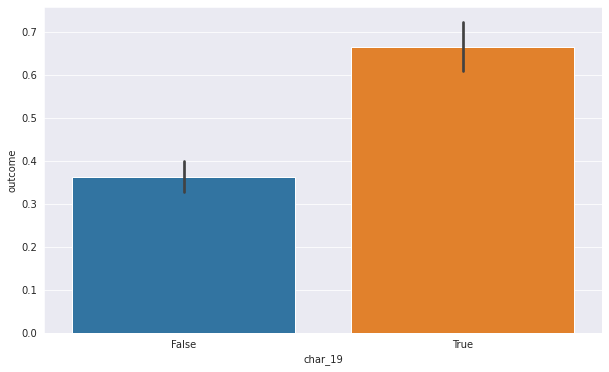

In [36]:
sns.barplot(data= merged_df.sample(1000), x='char_19', y= 'outcome')

In [37]:
merged_df.char_19.value_counts()

False    1485387
True      554289
Name: char_19, dtype: int64

## Feature Engineering

In [38]:
categorical_features = []
numeric_features = []
features = merged_df.columns.values.tolist()
for col in features:
    if merged_df[col].dtype != 'object': 
        numeric_features.append(col)
    else:
        categorical_features.append(col)

In [39]:
merged_df[numeric_features].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2039676 entries, 0 to 2197290
Data columns (total 30 columns):
 #   Column     Dtype
---  ------     -----
 0   outcome    int64
 1   char_10_y  bool 
 2   char_11    bool 
 3   char_12    bool 
 4   char_13    bool 
 5   char_14    bool 
 6   char_15    bool 
 7   char_16    bool 
 8   char_17    bool 
 9   char_18    bool 
 10  char_19    bool 
 11  char_20    bool 
 12  char_21    bool 
 13  char_22    bool 
 14  char_23    bool 
 15  char_24    bool 
 16  char_25    bool 
 17  char_26    bool 
 18  char_27    bool 
 19  char_28    bool 
 20  char_29    bool 
 21  char_30    bool 
 22  char_31    bool 
 23  char_32    bool 
 24  char_33    bool 
 25  char_34    bool 
 26  char_35    bool 
 27  char_36    bool 
 28  char_37    bool 
 29  char_38    int64
dtypes: bool(28), int64(2)
memory usage: 101.1 MB


In [40]:
merged_df[categorical_features].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2039676 entries, 0 to 2197290
Data columns (total 16 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   people_id          object
 1   activity_id        object
 2   date_x             object
 3   activity_category  object
 4   char_10_x          object
 5   char_1_y           object
 6   group_1            object
 7   char_2_y           object
 8   date_y             object
 9   char_3_y           object
 10  char_4_y           object
 11  char_5_y           object
 12  char_6_y           object
 13  char_7_y           object
 14  char_8_y           object
 15  char_9_y           object
dtypes: object(16)
memory usage: 264.5+ MB


In [41]:
merged_df['Date']= pd.to_datetime(merged_df['date_x'])
merged_df['year'] = merged_df['Date'].dt.year
merged_df['month'] = merged_df['Date'].dt.month
merged_df['day'] = merged_df['Date'].dt.day
merged_df['isweekend'] = (merged_df['Date'].dt.weekday >= 5).astype(int)
merged_df = merged_df.drop('date_x', axis = 1)


In [42]:
merged_df.head()

,people_id,activity_id,activity_category,char_10_x,outcome,char_1_y,group_1,char_2_y,date_y,char_3_y,char_4_y,char_5_y,char_6_y,char_7_y,char_8_y,char_9_y,char_10_y,char_11,char_12,char_13,char_14,char_15,char_16,char_17,char_18,char_19,char_20,char_21,char_22,char_23,char_24,char_25,char_26,char_27,char_28,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38,Date,year,month,day,isweekend
0,ppl_100,act2_1734928,type 4,type 76,0,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36,2023-08-26,2023,8,26,1
1,ppl_100,act2_2434093,type 2,type 1,0,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36,2022-09-27,2022,9,27,0
2,ppl_100,act2_3404049,type 2,type 1,0,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36,2022-09-27,2022,9,27,0
3,ppl_100,act2_3651215,type 2,type 1,0,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36,2023-08-04,2023,8,4,0
4,ppl_100,act2_4109017,type 2,type 1,0,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36,2023-08-26,2023,8,26,1


In [43]:
merged_df[['group', 'groupNo']]=merged_df['group_1'].str.split(' ',expand=True)

In [44]:
merged_df.drop(['group','group_1'],axis=1, inplace=True)

In [45]:
merged_df.drop('char_10_x', axis=1, inplace=True)

In [46]:
categorical_features

['people_id',
 'activity_id',
 'date_x',
 'activity_category',
 'char_10_x',
 'char_1_y',
 'group_1',
 'char_2_y',
 'date_y',
 'char_3_y',
 'char_4_y',
 'char_5_y',
 'char_6_y',
 'char_7_y',
 'char_8_y',
 'char_9_y']

In [47]:
categorical_features.remove('people_id')
categorical_features.remove('date_y')

categorical_features.remove('activity_id')

In [48]:
categorical_features.remove('char_10_x')

In [49]:
categorical_features.remove('date_x')
categorical_features.remove('group_1')

In [50]:
merged_df.drop(['activity_id','people_id','date_y'], axis=1, inplace=True)
merged_df.head(5)

,activity_category,outcome,char_1_y,char_2_y,char_3_y,char_4_y,char_5_y,char_6_y,char_7_y,char_8_y,char_9_y,char_10_y,char_11,char_12,char_13,char_14,char_15,char_16,char_17,char_18,char_19,char_20,char_21,char_22,char_23,char_24,char_25,char_26,char_27,char_28,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38,Date,year,month,day,isweekend,groupNo
0,type 4,0,type 2,type 2,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36,2023-08-26,2023,8,26,1,17304
1,type 2,0,type 2,type 2,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36,2022-09-27,2022,9,27,0,17304
2,type 2,0,type 2,type 2,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36,2022-09-27,2022,9,27,0,17304
3,type 2,0,type 2,type 2,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36,2023-08-04,2023,8,4,0,17304
4,type 2,0,type 2,type 2,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36,2023-08-26,2023,8,26,1,17304


In [51]:
merged_df["activity_category"], merged_df[categorical_features]

(0          type 4
 1          type 2
 2          type 2
 3          type 2
 4          type 2
             ...  
 2197286    type 4
 2197287    type 4
 2197288    type 2
 2197289    type 4
 2197290    type 2
 Name: activity_category, Length: 2039676, dtype: object,
         activity_category char_1_y char_2_y  ... char_7_y char_8_y char_9_y
 0                  type 4   type 2   type 2  ...  type 11   type 2   type 2
 1                  type 2   type 2   type 2  ...  type 11   type 2   type 2
 2                  type 2   type 2   type 2  ...  type 11   type 2   type 2
 3                  type 2   type 2   type 2  ...  type 11   type 2   type 2
 4                  type 2   type 2   type 2  ...  type 11   type 2   type 2
 ...                   ...      ...      ...  ...      ...      ...      ...
 2197286            type 4   type 2   type 3  ...   type 2   type 2   type 2
 2197287            type 4   type 2   type 3  ...   type 2   type 2   type 2
 2197288            type 2   type 2   ty

In [52]:
merged_df.head()

,activity_category,outcome,char_1_y,char_2_y,char_3_y,char_4_y,char_5_y,char_6_y,char_7_y,char_8_y,char_9_y,char_10_y,char_11,char_12,char_13,char_14,char_15,char_16,char_17,char_18,char_19,char_20,char_21,char_22,char_23,char_24,char_25,char_26,char_27,char_28,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38,Date,year,month,day,isweekend,groupNo
0,type 4,0,type 2,type 2,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36,2023-08-26,2023,8,26,1,17304
1,type 2,0,type 2,type 2,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36,2022-09-27,2022,9,27,0,17304
2,type 2,0,type 2,type 2,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36,2022-09-27,2022,9,27,0,17304
3,type 2,0,type 2,type 2,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36,2023-08-04,2023,8,4,0,17304
4,type 2,0,type 2,type 2,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36,2023-08-26,2023,8,26,1,17304


In [53]:
merged_df[categorical_features].corr()

""


In [54]:
merged_df.head(5)

,activity_category,outcome,char_1_y,char_2_y,char_3_y,char_4_y,char_5_y,char_6_y,char_7_y,char_8_y,char_9_y,char_10_y,char_11,char_12,char_13,char_14,char_15,char_16,char_17,char_18,char_19,char_20,char_21,char_22,char_23,char_24,char_25,char_26,char_27,char_28,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38,Date,year,month,day,isweekend,groupNo
0,type 4,0,type 2,type 2,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36,2023-08-26,2023,8,26,1,17304
1,type 2,0,type 2,type 2,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36,2022-09-27,2022,9,27,0,17304
2,type 2,0,type 2,type 2,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36,2022-09-27,2022,9,27,0,17304
3,type 2,0,type 2,type 2,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36,2023-08-04,2023,8,4,0,17304
4,type 2,0,type 2,type 2,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36,2023-08-26,2023,8,26,1,17304


In [55]:
merged_df.head(5)

,activity_category,outcome,char_1_y,char_2_y,char_3_y,char_4_y,char_5_y,char_6_y,char_7_y,char_8_y,char_9_y,char_10_y,char_11,char_12,char_13,char_14,char_15,char_16,char_17,char_18,char_19,char_20,char_21,char_22,char_23,char_24,char_25,char_26,char_27,char_28,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38,Date,year,month,day,isweekend,groupNo
0,type 4,0,type 2,type 2,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36,2023-08-26,2023,8,26,1,17304
1,type 2,0,type 2,type 2,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36,2022-09-27,2022,9,27,0,17304
2,type 2,0,type 2,type 2,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36,2022-09-27,2022,9,27,0,17304
3,type 2,0,type 2,type 2,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36,2023-08-04,2023,8,4,0,17304
4,type 2,0,type 2,type 2,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36,2023-08-26,2023,8,26,1,17304


## Scaling Numeric Features

In [56]:
from sklearn.preprocessing import MinMaxScaler

In [57]:
scaler= MinMaxScaler()
merged_df['char_38']= scaler.fit_transform(merged_df[['char_38']])


In [58]:
merged_df.head()

,activity_category,outcome,char_1_y,char_2_y,char_3_y,char_4_y,char_5_y,char_6_y,char_7_y,char_8_y,char_9_y,char_10_y,char_11,char_12,char_13,char_14,char_15,char_16,char_17,char_18,char_19,char_20,char_21,char_22,char_23,char_24,char_25,char_26,char_27,char_28,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38,Date,year,month,day,isweekend,groupNo
0,type 4,0,type 2,type 2,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,0.36,2023-08-26,2023,8,26,1,17304
1,type 2,0,type 2,type 2,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,0.36,2022-09-27,2022,9,27,0,17304
2,type 2,0,type 2,type 2,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,0.36,2022-09-27,2022,9,27,0,17304
3,type 2,0,type 2,type 2,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,0.36,2023-08-04,2023,8,4,0,17304
4,type 2,0,type 2,type 2,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,0.36,2023-08-26,2023,8,26,1,17304


In [59]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2039676 entries, 0 to 2197290
Data columns (total 46 columns):
 #   Column             Dtype         
---  ------             -----         
 0   activity_category  object        
 1   outcome            int64         
 2   char_1_y           object        
 3   char_2_y           object        
 4   char_3_y           object        
 5   char_4_y           object        
 6   char_5_y           object        
 7   char_6_y           object        
 8   char_7_y           object        
 9   char_8_y           object        
 10  char_9_y           object        
 11  char_10_y          bool          
 12  char_11            bool          
 13  char_12            bool          
 14  char_13            bool          
 15  char_14            bool          
 16  char_15            bool          
 17  char_16            bool          
 18  char_17            bool          
 19  char_18            bool          
 20  char_19            bool 

In [60]:
 del_col = ['char_2_y', 'char_1_y', 'char_3_y','char_4_y','char_5_y','char_6_y','char_7_y','char_8_y','char_9_y','groupNo','activity_category']
    

In [61]:
merged_df.drop(del_col,axis=1,inplace=True)

In [62]:
merged_df.drop('Date', axis=1, inplace=True)

## Input and Target Columns

In [63]:
input_df= merged_df.drop('outcome', axis=1)
target = merged_df.outcome

## Train test split

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
 X_train, X_test, y_train, y_test = train_test_split(
     input_df, target, test_size=0.33, random_state=42)

In [66]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1366582, 33), (673094, 33), (1366582,), (673094,))

## Traininf Random Forest Model

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
model_rf = RandomForestClassifier(n_jobs=-1, random_state=42)

In [69]:
model_rf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

### Scoring

In [70]:
model_rf.score(X_train, y_train)

0.9230971869964627

In [71]:
model_rf.score(X_test, y_test)

0.9035870175636687

In [72]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [73]:
train_probs = model_rf.predict_proba(X_train)
train_probs

array([[0.32580556, 0.67419444],
       [1.        , 0.        ],
       [0.35160808, 0.64839192],
       ...,
       [0.15906277, 0.84093723],
       [0.        , 1.        ],
       [0.35096044, 0.64903956]])

In [74]:
y_pred= model_rf.predict(X_test)
y_true = y_test

In [75]:
confusion_matrix(y_true, y_pred)

array([[329833,  42643],
       [ 22252, 278366]])

### Confusion Metrix

Text(0.5, 1.0, 'Confusion Metrics')

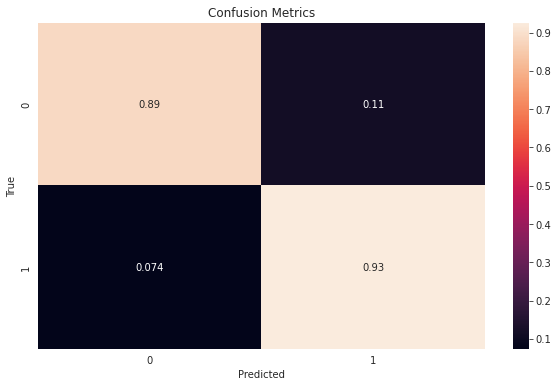

In [76]:
sns.heatmap(confusion_matrix(y_true,y_pred, normalize='true'), annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Metrics')


### Classification Report

In [77]:
from sklearn.metrics import classification_report

In [78]:
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91    372476
           1       0.87      0.93      0.90    300618

    accuracy                           0.90    673094
   macro avg       0.90      0.91      0.90    673094
weighted avg       0.91      0.90      0.90    673094



In [79]:
print(model_rf.max_features)


auto


### Feature Importance

In [80]:
model_rf.feature_importances_

array([0.00803693, 0.0069273 , 0.00615901, 0.02818365, 0.00915488,
       0.00584245, 0.00848315, 0.01251889, 0.00603448, 0.00725274,
       0.00692922, 0.00690775, 0.0113784 , 0.00774712, 0.00527155,
       0.02424488, 0.00602672, 0.00739379, 0.00670498, 0.0062454 ,
       0.00581976, 0.01066124, 0.00851855, 0.00587226, 0.01752326,
       0.0069374 , 0.0246358 , 0.01036045, 0.58269101, 0.00934779,
       0.04719601, 0.07722693, 0.00576624])

In [81]:
feature_importance_df= pd.DataFrame({
    'Features': X_train.columns,
    'importance': model_rf.feature_importances_
                                    }).sort_values('importance', ascending=False)
feature_importance_df

,Features,importance
28,char_38,0.582691
31,day,0.077227
30,month,0.047196
3,char_13,0.028184
26,char_36,0.024636
15,char_25,0.024245
24,char_34,0.017523
7,char_17,0.012519
12,char_22,0.011378
21,char_31,0.010661


Text(0.5, 1.0, 'Feature Importance')

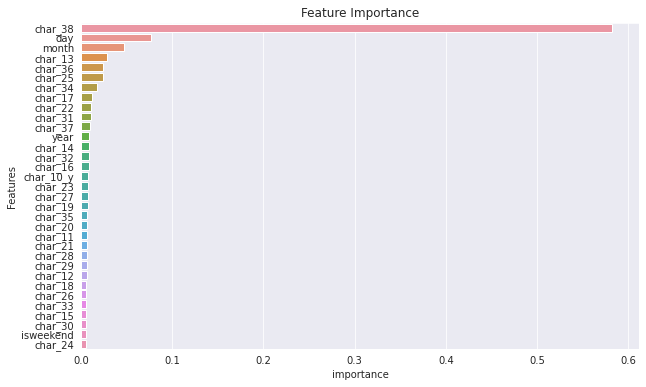

In [82]:
sns.barplot(x='importance', y='Features', data= feature_importance_df)
plt.title('Feature Importance')

In [83]:
def max_depth_error(md):
    model_rf = RandomForestClassifier(max_depth=md, random_state=42)
    model_rf.fit(X_train, y_train)
    train_acc = 1 - model_rf.score(X_train, y_train)
    val_acc = 1 - model_rf.score(X_test, y_test)
    return {'Max Depth': md, 'Training Error': train_acc, 'Validation Error': val_acc}

## Training XGBoost Model

In [84]:
!pip install graphviz xgboost --upgrade --q

     |████████████████████████████████| 46 kB 1.7 MB/s 
     |████████████████████████████████| 173.6 MB 7.1 kB/s 


In [85]:
from xgboost import XGBClassifier

In [86]:
from sklearn.metrics import accuracy_score

In [87]:
model_xgb = XGBClassifier(random_state=42, n_jobs=-1)

In [88]:
%%time
model_xgb.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[09:57:57] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CPU times: user 9min 24s, sys: 788 ms, total: 9min 25s
Wall time: 5min 11s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### Scoring

In [89]:
model_xgb.score(X_train,y_train)

0.8672176276286384

In [90]:
model_xgb.score(X_test,y_test)

0.865668093906646

In [91]:
trees = model_xgb.get_booster().get_dump()
print(trees[0])

0:[char_38<0.474999994] yes=1,no=2,missing=1
	1:[char_38<0.465000004] yes=3,no=4,missing=3
		3:[char_38<0.454999983] yes=7,no=8,missing=7
7:[char_20] yes=16,no=15
				15:[char_38<0.00499999989] yes=31,no=32,missing=31
					31:[month<9] yes=63,no=64,missing=63
						63:leaf=-0.547611415
						64:leaf=-0.583353221
					32:leaf=-0.599170268
16:[char_18] yes=34,no=33
					33:[char_38<0.375] yes=65,no=66,missing=65
						65:leaf=-0.597369432
						66:leaf=-0.165263727
					34:leaf=-0.599739015
8:[char_25] yes=18,no=17
17:[char_10_y] yes=36,no=35
35:[char_23] yes=68,no=67
						67:leaf=-0.393939406
						68:leaf=-0.0960452035
36:[char_31] yes=70,no=69
						69:leaf=0.235872239
						70:leaf=-0.588273644
18:[char_23] yes=38,no=37
					37:[day<5] yes=71,no=72,missing=71
						71:leaf=-0.413793117
						72:leaf=-0.551702797
					38:leaf=-0.597887874
4:[char_25] yes=10,no=9
9:[char_27] yes=20,no=19
19:[char_20] yes=40,no=39
39:[char_31] yes=74,no=73
						73:leaf=-0.0951846465
						74:leaf=0.26

In [92]:
def test_params(**params):
    model_xgb2 = XGBClassifier(random_state=42, n_jobs=-1, **params)
    model_xgb2.fit(X_train, y_train)
    return model_xgb2.score(X_train, y_train), model_xgb2.score(X_test, y_test)

In [93]:
def predict_input(model, single_input):
    input_df = pd.DataFrame([single_input])
    input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
    X_input = input_df[numeric_cols + encoded_cols]
    pred = model.predict(X_input)[0]
    prob = model.predict_proba(X_input)[0][list(model.classes_).index(pred)]
    return pred, prob

In [94]:
test_params(n_estimators=100)

/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[10:03:28] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


(0.8672176276286384, 0.865668093906646)